In [16]:
import pandas as pd
import os

In [42]:
pumpkins = pd.read_csv("../data/US-pumpkins.csv")
pumpkins = pumpkins[pumpkins["Package"].str.contains("bushel", case=True, regex=True)]

In [44]:
pumpkins.shape

(415, 26)

In [45]:
pumpkins.isna().sum()

City Name            0
Type               406
Package              0
Variety              0
Sub Variety        167
Grade              415
Date                 0
Low Price            0
High Price           0
Mostly Low          24
Mostly High         24
Origin               0
Origin District    396
Item Size          114
Color              145
Environment        415
Unit of Sale       404
Quality            415
Condition          415
Appearance         415
Storage            415
Crop               415
Repack               0
Trans Mode         415
Unnamed: 24        415
Unnamed: 25        391
dtype: int64

In [46]:
pumpkins = pumpkins.loc[:, ["Package", "Low Price", "High Price", "Date"]]
print(pumpkins.columns)
print(pumpkins.isna().sum())

Index(['Package', 'Low Price', 'High Price', 'Date'], dtype='object')
Package       0
Low Price     0
High Price    0
Date          0
dtype: int64


In [47]:
price = (pumpkins["Low Price"] + pumpkins["High Price"]) / 2
month = pd.DatetimeIndex(pumpkins["Date"]).month

In [48]:
print(month)

Index([ 9,  9, 10, 10, 10, 10, 10, 10, 10, 10,
       ...
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9],
      dtype='int32', name='Date', length=415)


In [49]:
new_pumpkins = pd.DataFrame({"Month": month, "Package": pumpkins["Package"],
                             "Low Price": pumpkins["Low Price"], "High price": pumpkins["High Price"],
                             "Price": price})


In [54]:
pack_unique = pumpkins["Package"].value_counts()
print(pack_unique)

Package
1/2 bushel cartons      234
1 1/9 bushel cartons    117
bushel cartons           37
1 1/9 bushel crates      17
bushel baskets           10
Name: count, dtype: int64


In [55]:
new_pumpkins.loc[new_pumpkins["Package"].str.contains("1/2"), "Price"] = price / (1 / 2)
new_pumpkins.loc[new_pumpkins["Package"].str.contains("1 1/9"), "Price"] = price / (1 + 1 / 9)

In [56]:
import matplotlib.pyplot as plt

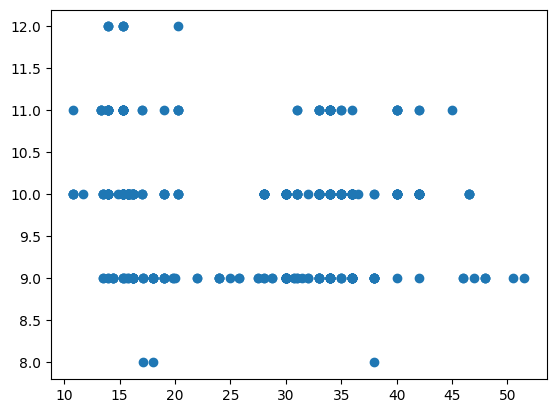

In [57]:
price = new_pumpkins["Price"]
month = new_pumpkins["Month"]
plt.scatter(price, month)
plt.show()